# 5. scATAC profiles of fetal tissues from the fetal cell atlas dataset
Domcke S, Hill AJ, Daza RM, Cao J, O’Day DR, Pliner HA, et al. A human cell atlas of fetal chromatin accessibility. Science. 2020;370:eaba7612

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

#Setup path to R for propeller
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [3]:
fetal_scatac_counts = pd.read_csv("data/scATAC_counts.tsv", sep='\t')

In [4]:
fetal_scatac = convert_counts_to_df(fetal_scatac_counts, column_name="cell_type")

In [5]:
fetal_scatac.head()

,Sample,Sex,Tissue,Batch,Donor_id,cell_type
cell_1,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells
cell_2,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells
cell_3,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells
cell_4,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells
cell_5,sample_16_adrenal,Female,Adrenal,batch_1,H27471,Adrenocortical cells


------------

## Run Scanpro

### With replicates

In [6]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                                   conds_col='Tissue', samples_col='Sample')

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [7]:
scanpro_out.results

,baseline_props,mean_props_Adrenal,mean_props_Brain,mean_props_Eye,mean_props_Heart,mean_props_Intestine,mean_props_Kidney,mean_props_Liver,mean_props_Lung,mean_props_Muscle,mean_props_Placenta,mean_props_Stomach,mean_props_Thymus,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,,,,,,,,,,
Adrenocortical cells,0.084436,0.814156,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.849862e-17,0.000000e+00,0.000000,0.000000,80.462313,0.0,0.0
Astrocytes,0.012881,0.000000,0.111011,0.000000,8.460747e-18,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,70.888388,0.0,0.0
Cardiomyocytes,0.069971,0.000000,0.000000,0.000000,6.629074e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,94.733757,0.0,0.0
Chromaffin cells,0.007953,0.065029,0.000000,0.000000,0.000000e+00,0.019419,0.000000,0.000000,0.000000,6.137343e-18,2.408384e-18,0.000000,0.000000,56.807909,0.0,0.0
Epithelial cells,0.000885,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.204832,0.000000,29.750816,0.0,0.0
Erythroblasts,0.212123,0.007910,0.000000,0.000000,2.315121e-02,0.000000,0.000000,0.689365,0.000000,1.801177e-19,2.332379e-02,0.000000,0.000000,163.148151,0.0,0.0
Excitatory neurons,0.075686,0.000000,0.698202,0.000000,5.321354e-17,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,110.511930,0.0,0.0
Ganglion cells,0.001483,0.000000,0.000000,0.205163,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.606191e-17,0.000000,0.000000,40.975460,0.0,0.0
Goblet cells,0.001867,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.420814,0.000000,34.417602,0.0,0.0


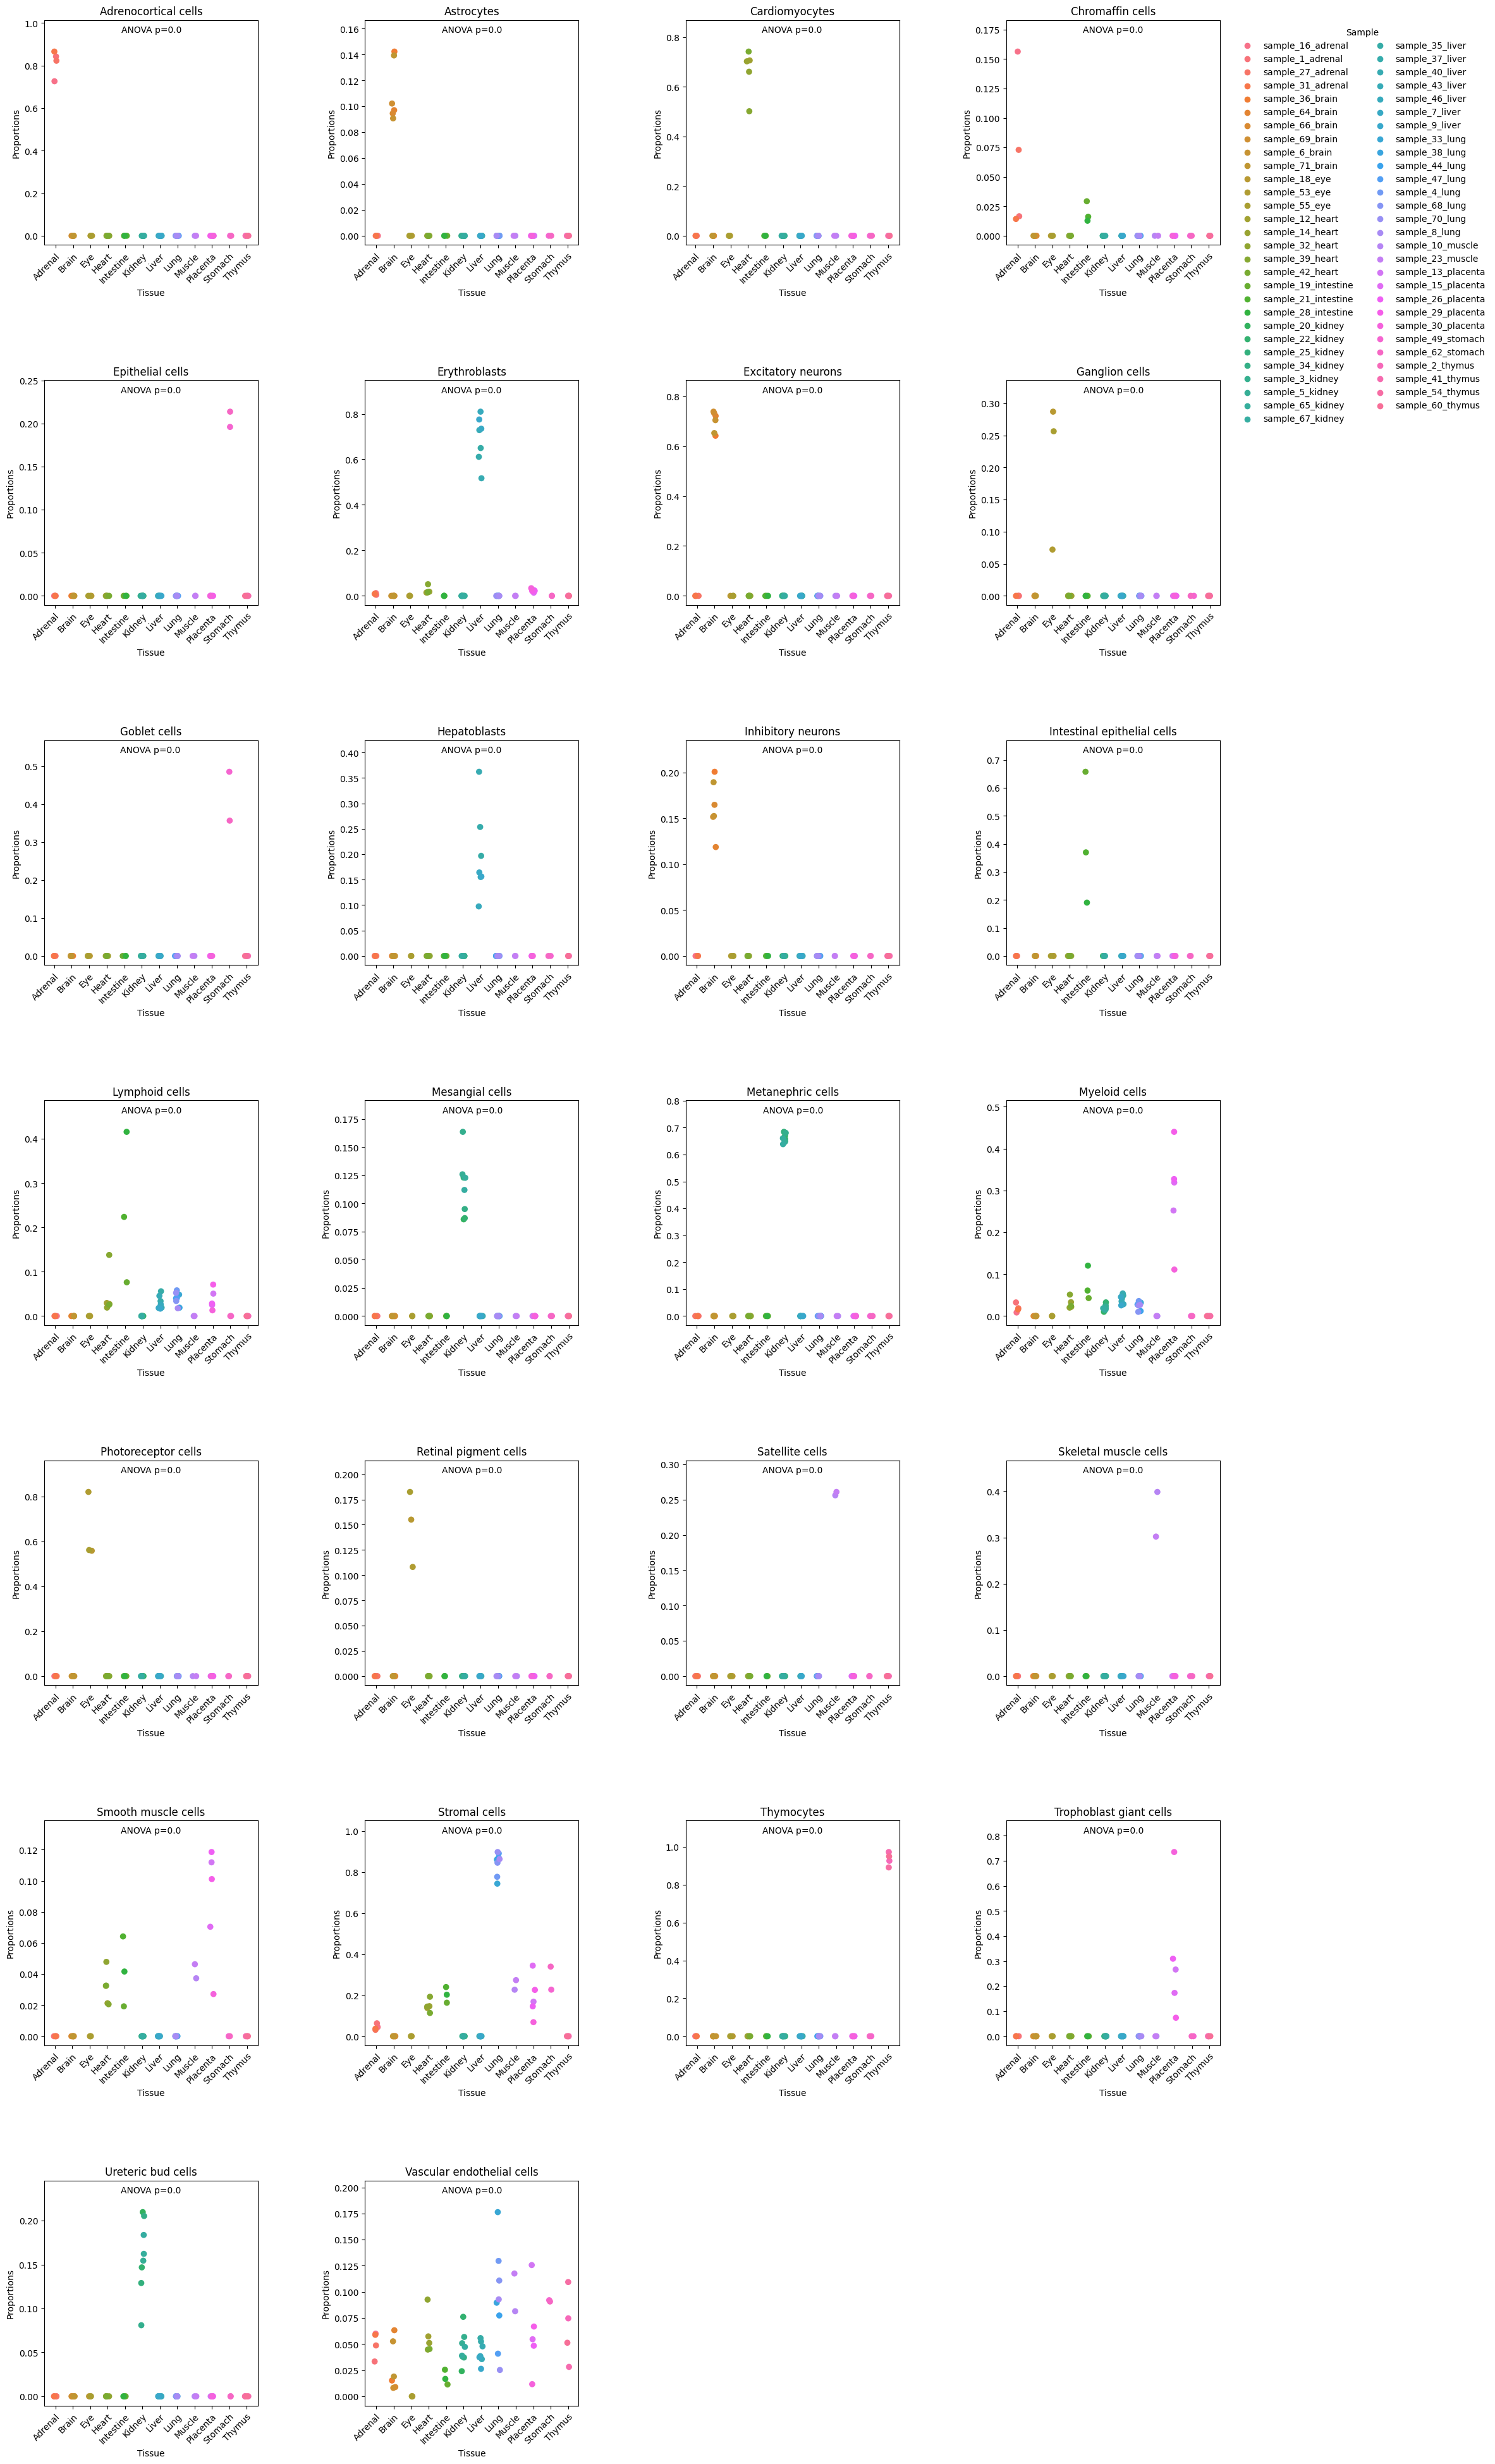

In [8]:
scanpro_out.plot(n_columns=4, save=f"{FIG_PATH}/scatac_rep_all.pdf")

In [9]:
scanpro_out.results.to_csv("results/scatac_scanpro_rep.tsv", sep="\t")

### Without replicates

In [10]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                                    conds_col='Tissue')
scanpro_out_norep.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 85.6 seconds


,baseline_props,mean_props_Adrenal,mean_props_Brain,mean_props_Eye,mean_props_Heart,mean_props_Intestine,mean_props_Kidney,mean_props_Liver,mean_props_Lung,mean_props_Muscle,mean_props_Placenta,mean_props_Stomach,mean_props_Thymus,p_values
clusters,,,,,,,,,,,,,,
Adrenocortical cells,0.084436,0.825272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Astrocytes,0.012881,0.000000,0.114083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508579e-08
Cardiomyocytes,0.069971,0.000000,0.000000,0.000000,0.617677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Chromaffin cells,0.007953,0.063283,0.000000,0.000000,0.000000,0.015716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.645363e-10
Epithelial cells,0.000885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196689,0.000000,6.153034e-12
Erythroblasts,0.212123,0.004168,0.000000,0.000000,0.026412,0.000000,0.000000,0.670879,0.000000,0.000000,0.017098,0.000000,0.000000,0.000000e+00
Excitatory neurons,0.075686,0.000000,0.685454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Ganglion cells,0.001483,0.000000,0.000000,0.253235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.051492e-11
Goblet cells,0.001867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428127,0.000000,2.220446e-16


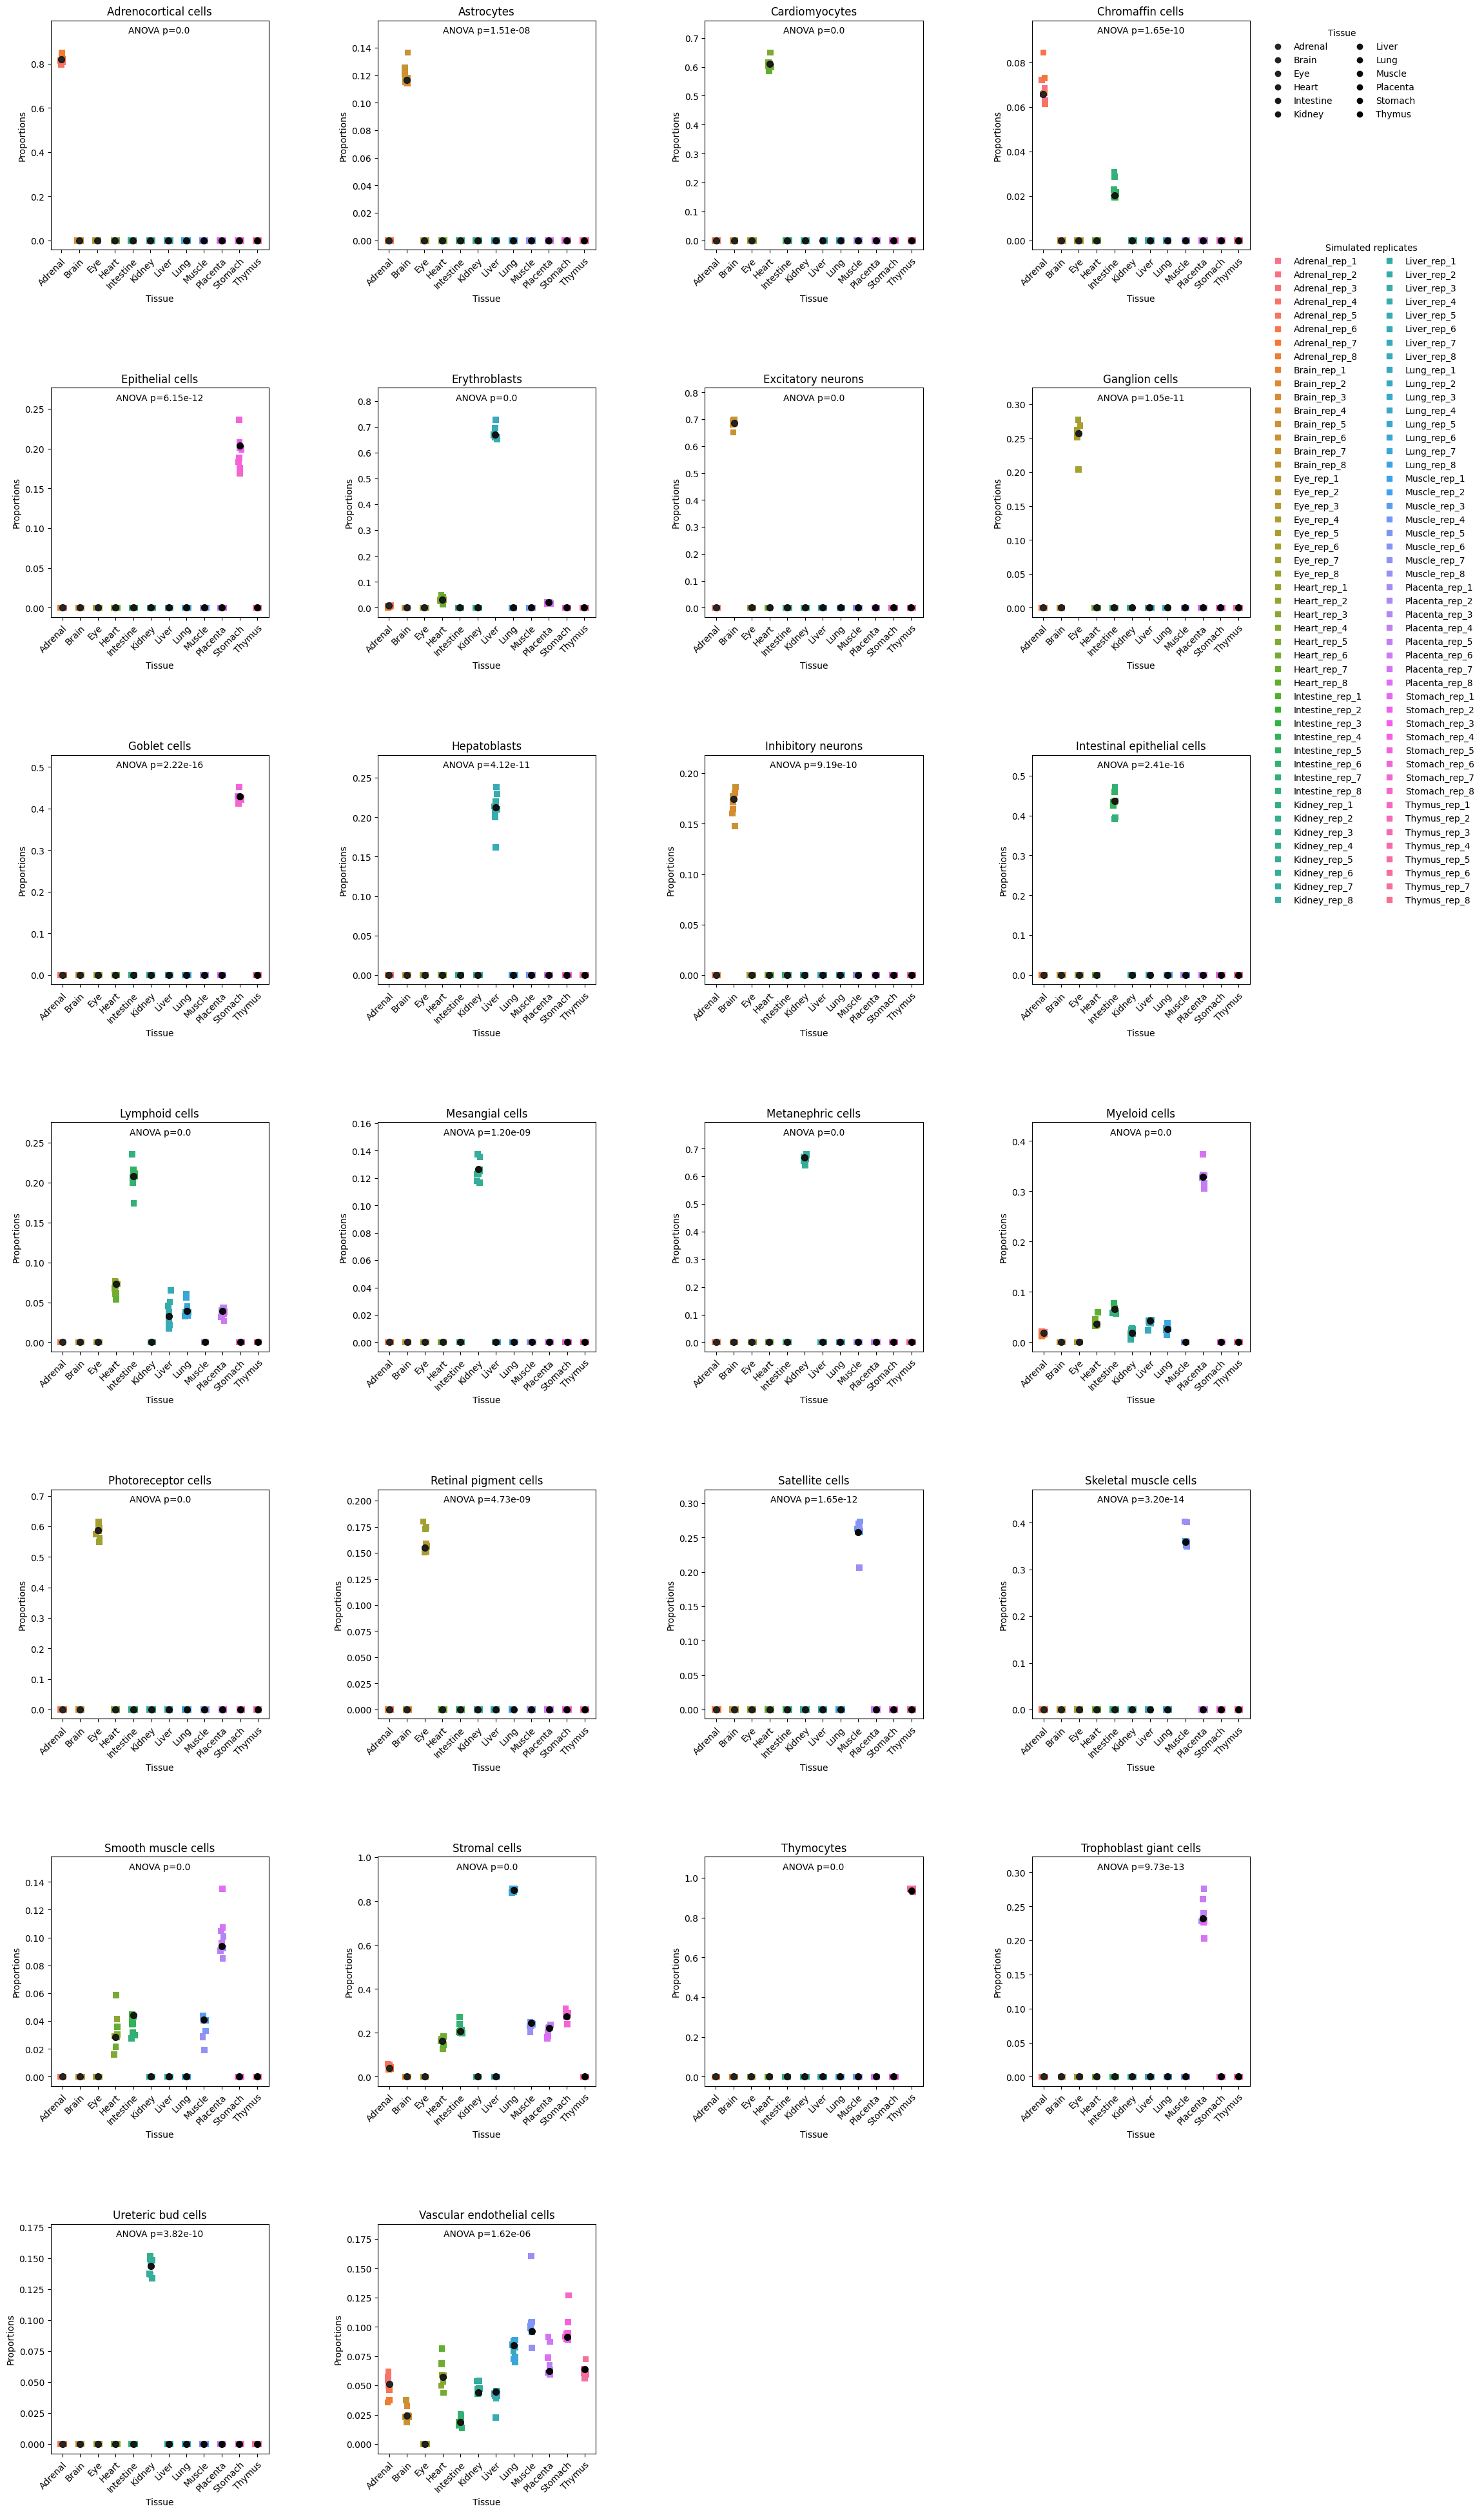

In [11]:
scanpro_out_norep.plot(n_columns=4, save=f"{FIG_PATH}/scatac_norep_all.pdf")

In [12]:
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep.tsv", sep="\t")

------------------------

## Specific comparisons

### Heart vs. muscle

#### With replicates

In [13]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue', samples_col='Sample',
                              conditions=["Heart", "Muscle"])
scanpro_out.results.to_csv("results/scatac_scanpro_rep_logit_heart-muscle.tsv", sep="\t")

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


In [14]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue', samples_col='Sample',
                              conditions=["Heart", "Muscle"], transform="arcsin")
scanpro_out.results.to_csv("results/scatac_scanpro_rep_arcsin_heart-muscle.tsv", sep="\t")
scanpro_out.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


,baseline_props,mean_props_Heart,mean_props_Muscle,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Cardiomyocytes,0.069971,0.662907,-3.438219e-17,-1.928054e+16,14.235196,6.739920e-06,2.021976e-05
Erythroblasts,0.212123,0.023151,-1.995824e-18,-1.159983e+16,4.607451,3.541366e-03,6.374458e-03
Lymphoid cells,0.035767,0.047833,-4.173811e-18,-1.146023e+16,2.977475,2.432684e-02,3.127737e-02
Myeloid cells,0.040497,0.030123,-2.359650e-18,-1.276598e+16,6.833771,4.557875e-04,1.025522e-03
Satellite cells,0.008074,0.000000,2.585864e-01,0.000000e+00,-74.786129,3.028844e-10,2.725960e-09
Skeletal muscle cells,0.011216,0.000000,3.501920e-01,0.000000e+00,-24.910008,2.366455e-07,1.064905e-06
Smooth muscle cells,0.010909,0.030924,4.180586e-02,7.397127e-01,-1.345375,2.265100e-01,2.265100e-01
Stromal cells,0.129690,0.146847,2.499262e-01,5.875620e-01,-4.260494,5.161144e-03,7.741715e-03
Vascular endothelial cells,0.049483,0.058214,9.948945e-02,5.851259e-01,-2.497251,4.618564e-02,5.195885e-02


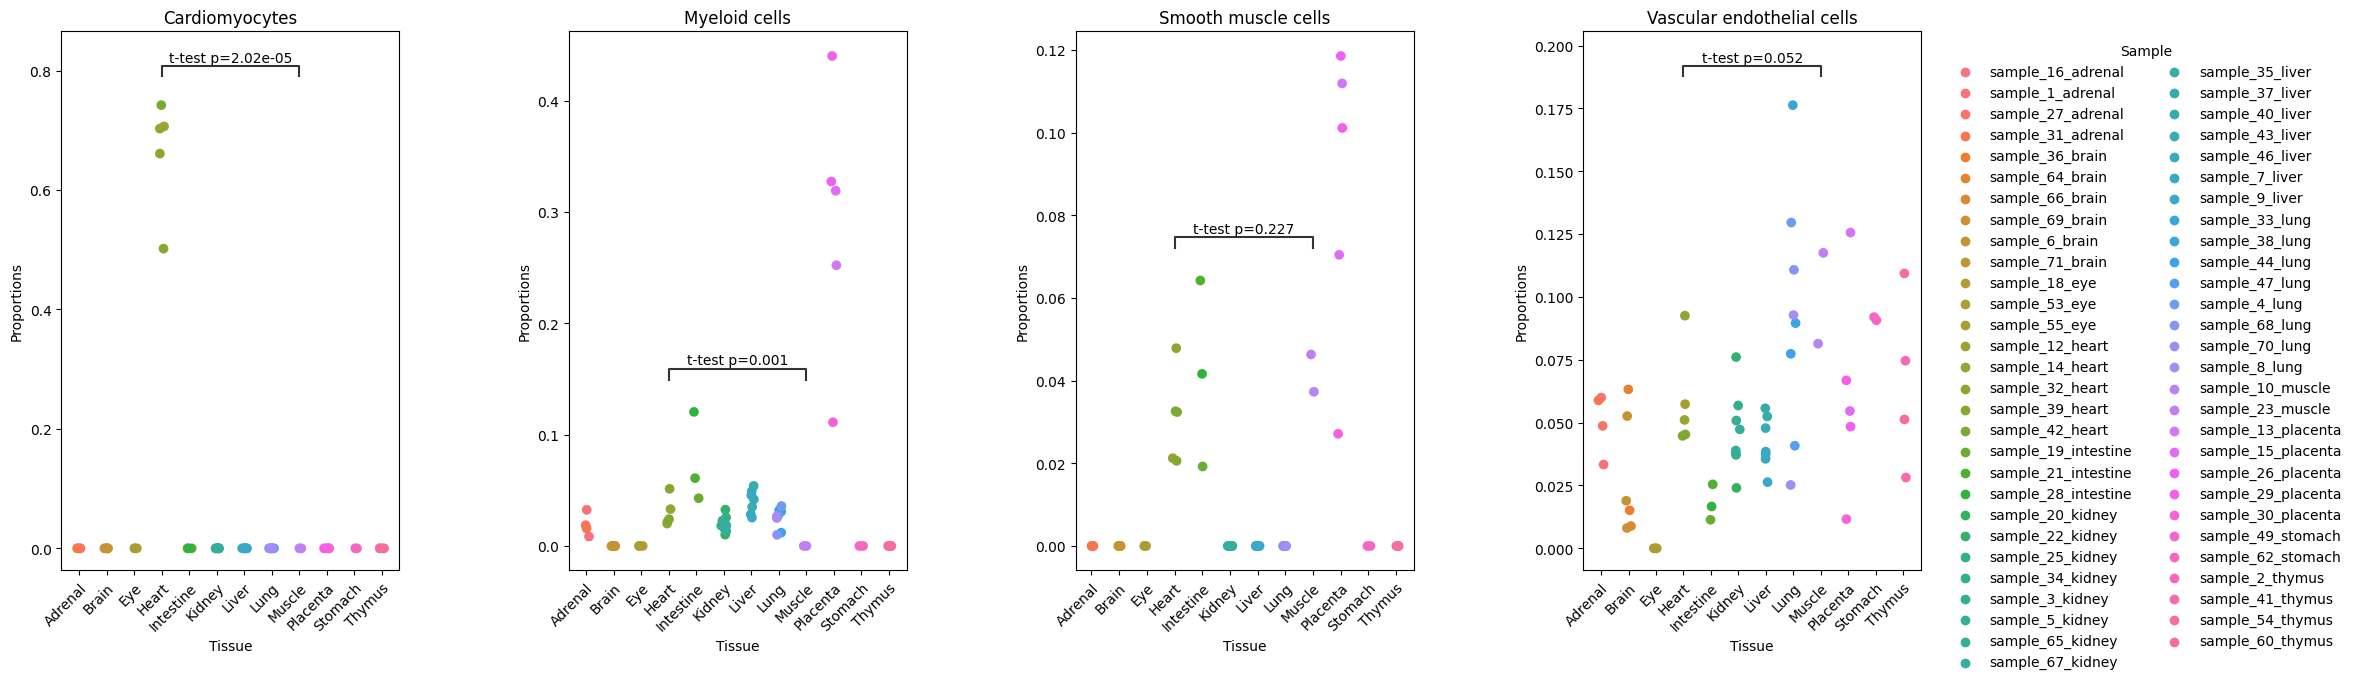

In [15]:
scanpro_out.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"], 
                 n_columns=4, save=f"{FIG_PATH}/scatac_rep_arcsin_heart-muscle.pdf")

#### Without replicates

In [16]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type', conds_col='Tissue',
                                    conditions=["Heart", "Muscle"], transform="logit")
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep_logit_heart-muscle.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 76.76 seconds


In [17]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type', conds_col='Tissue',
                                    conditions=["Heart", "Muscle"], transform="arcsin")
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep_arcsin_heart-muscle.tsv", sep="\t")
scanpro_out_norep.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 77.5 seconds


,baseline_props,mean_props_Heart,mean_props_Muscle,p_values
clusters,,,,
Cardiomyocytes,0.069971,0.625038,0.000000,3.077011e-11
Erythroblasts,0.212123,0.026020,0.000000,8.970672e-03
Lymphoid cells,0.035767,0.060999,0.000000,9.597618e-04
Myeloid cells,0.040497,0.030150,0.000000,3.806060e-03
Satellite cells,0.008074,0.000000,0.248588,2.924944e-06
Skeletal muscle cells,0.011216,0.000000,0.356469,5.163680e-08
Smooth muscle cells,0.010909,0.025053,0.033214,5.563187e-01
Stromal cells,0.129690,0.151181,0.233616,1.433902e-01
Vascular endothelial cells,0.049483,0.052650,0.091507,2.204815e-01


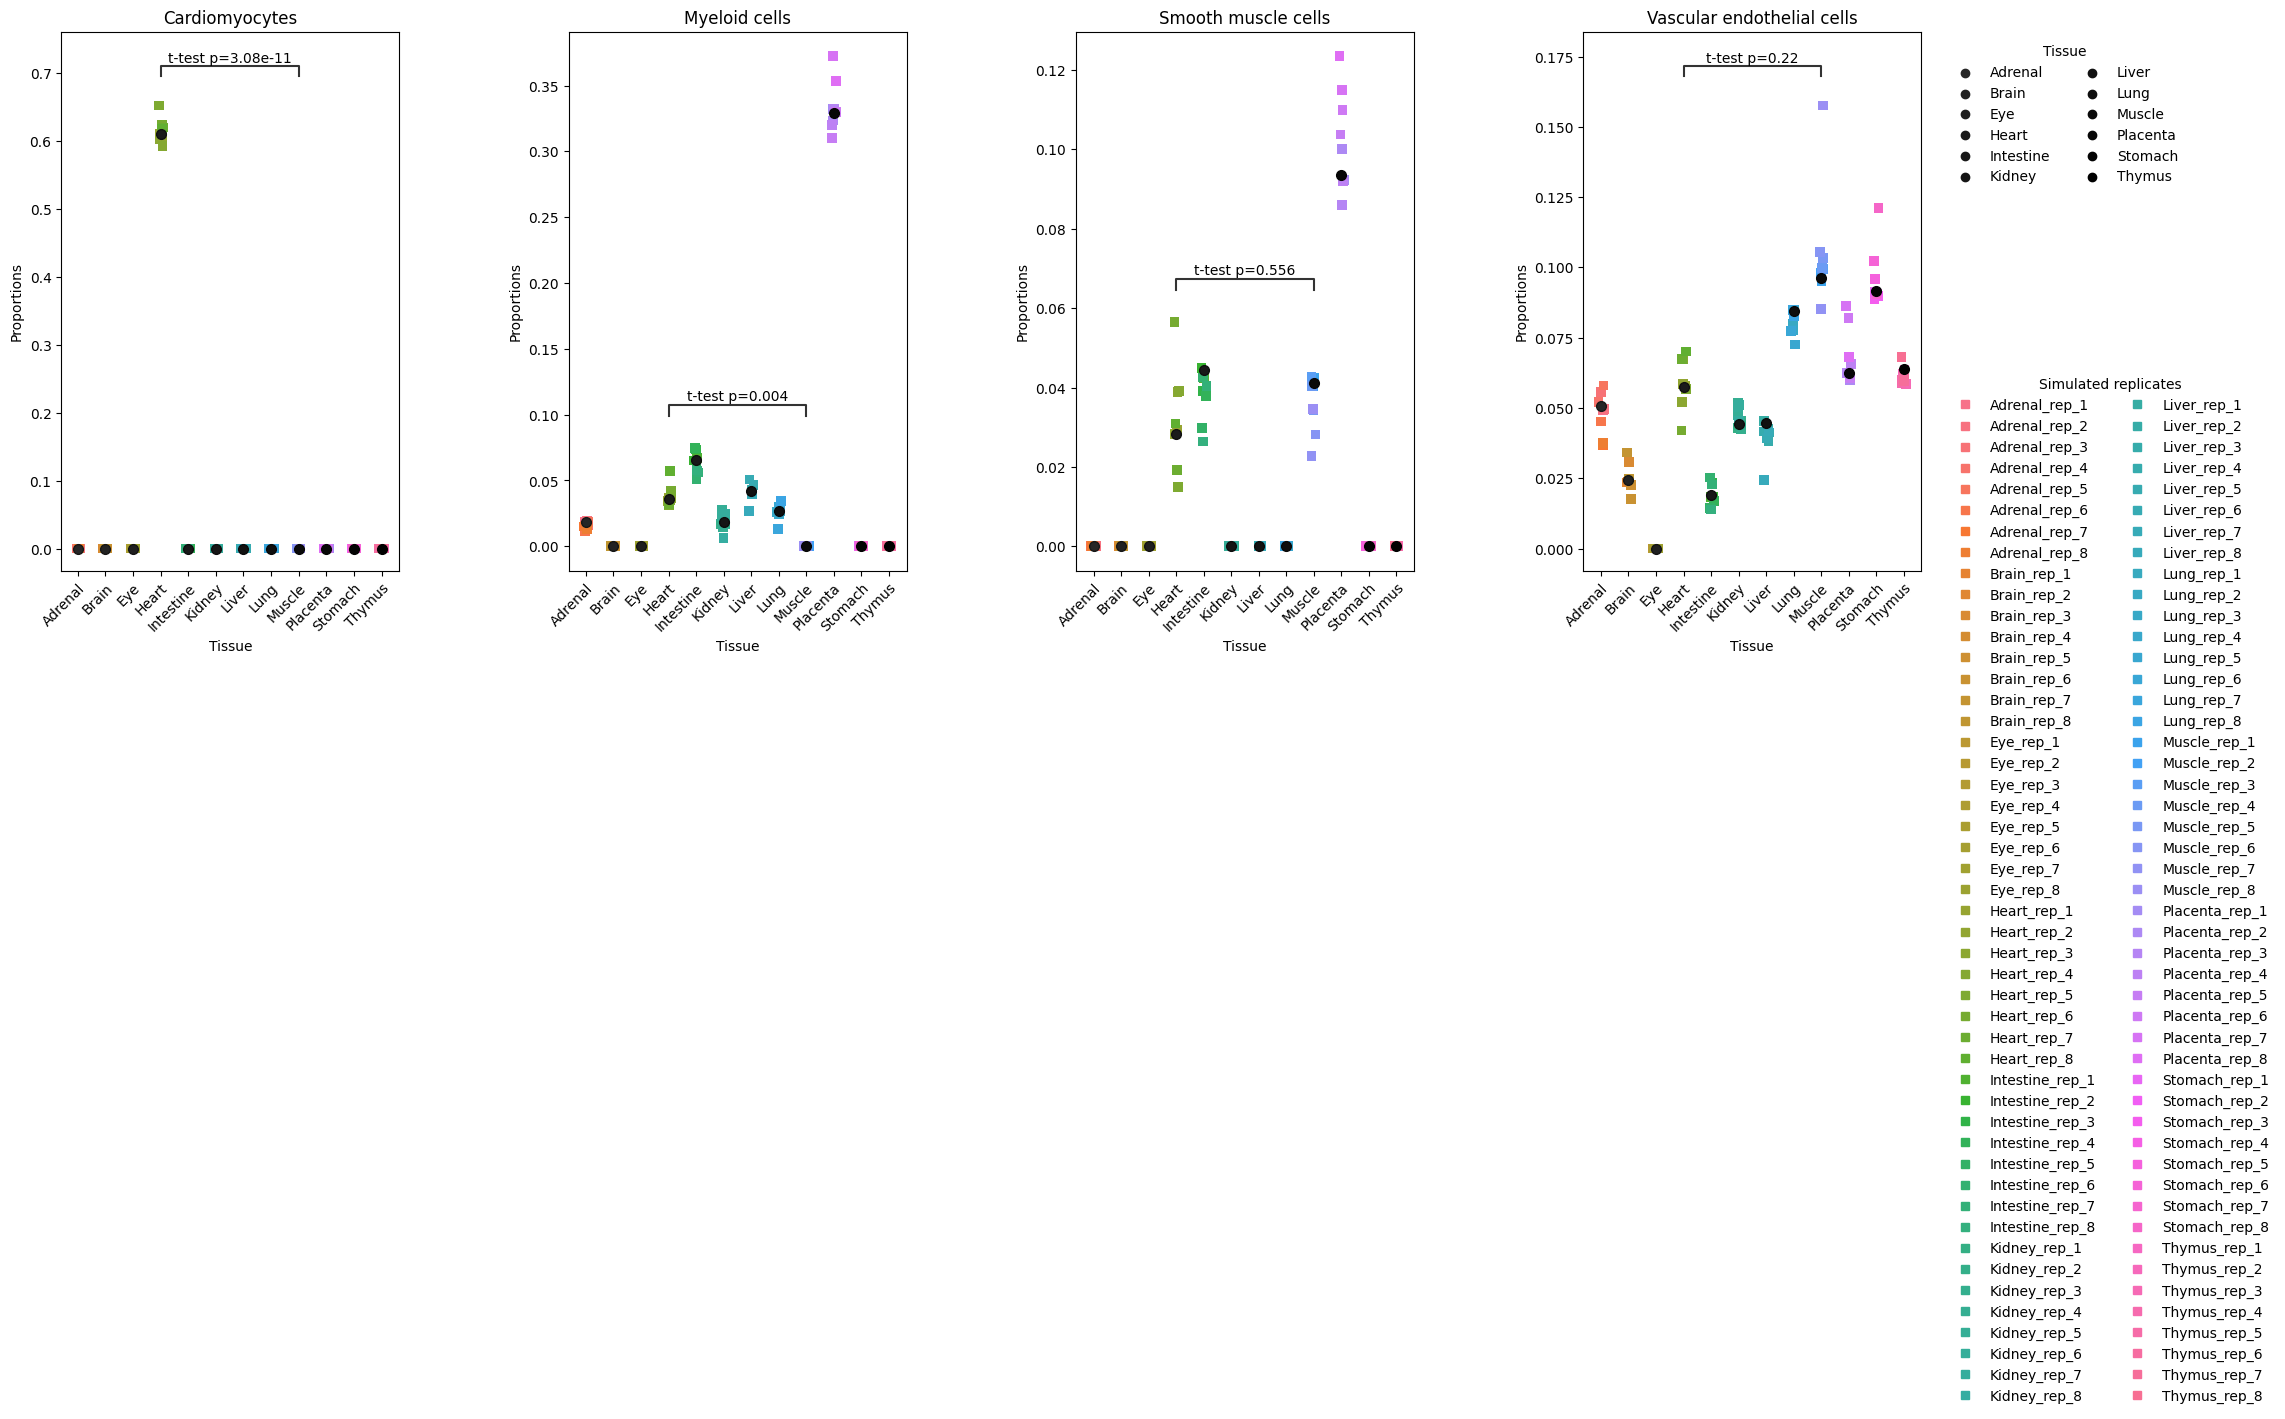

In [18]:
scanpro_out_norep.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"], 
                       n_columns=4, save=f"{FIG_PATH}/scatac_norep_arcsin_heart-muscle.pdf")

### Heart vs. intestine vs. muscle

#### With replicates

In [19]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue', samples_col='Sample',
                              conditions=["Heart", "Intestine", "Muscle"])
scanpro_out.results.to_csv("results/scatac_scanpro_rep_logit_heart-intestine-muscle.tsv", sep="\t")

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [20]:
scanpro_out = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue', samples_col='Sample',
                              conditions=["Heart", "Intestine", "Muscle"], transform="arcsin")
scanpro_out.results.to_csv("results/scatac_scanpro_rep_arcsin_heart-intestine-muscle.tsv", sep="\t")
scanpro_out.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Heart,mean_props_Intestine,mean_props_Muscle,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Cardiomyocytes,0.069971,0.662907,0.000000,2.622538e-17,231.626990,0.000000e+00,0.000000e+00
Chromaffin cells,0.007953,0.000000,0.019419,-3.056422e-18,63.794973,0.000000e+00,0.000000e+00
Erythroblasts,0.212123,0.023151,0.000000,1.206336e-18,23.989931,3.813339e-11,6.991121e-11
Intestinal epithelial cells,0.025494,0.000000,0.406002,-6.390298e-17,31.423270,2.253753e-14,4.958256e-14
Lymphoid cells,0.035767,0.047833,0.238626,-3.581810e-17,9.552509,7.102286e-05,8.680571e-05
Myeloid cells,0.040497,0.030123,0.074752,-9.683707e-18,20.682922,1.041169e-09,1.636123e-09
Satellite cells,0.008074,0.000000,0.000000,2.585864e-01,3139.391623,0.000000e+00,0.000000e+00
Skeletal muscle cells,0.011216,0.000000,0.000000,3.501920e-01,444.886869,0.000000e+00,0.000000e+00
Smooth muscle cells,0.010909,0.030924,0.041686,4.180586e-02,0.672020,5.106762e-01,5.106762e-01


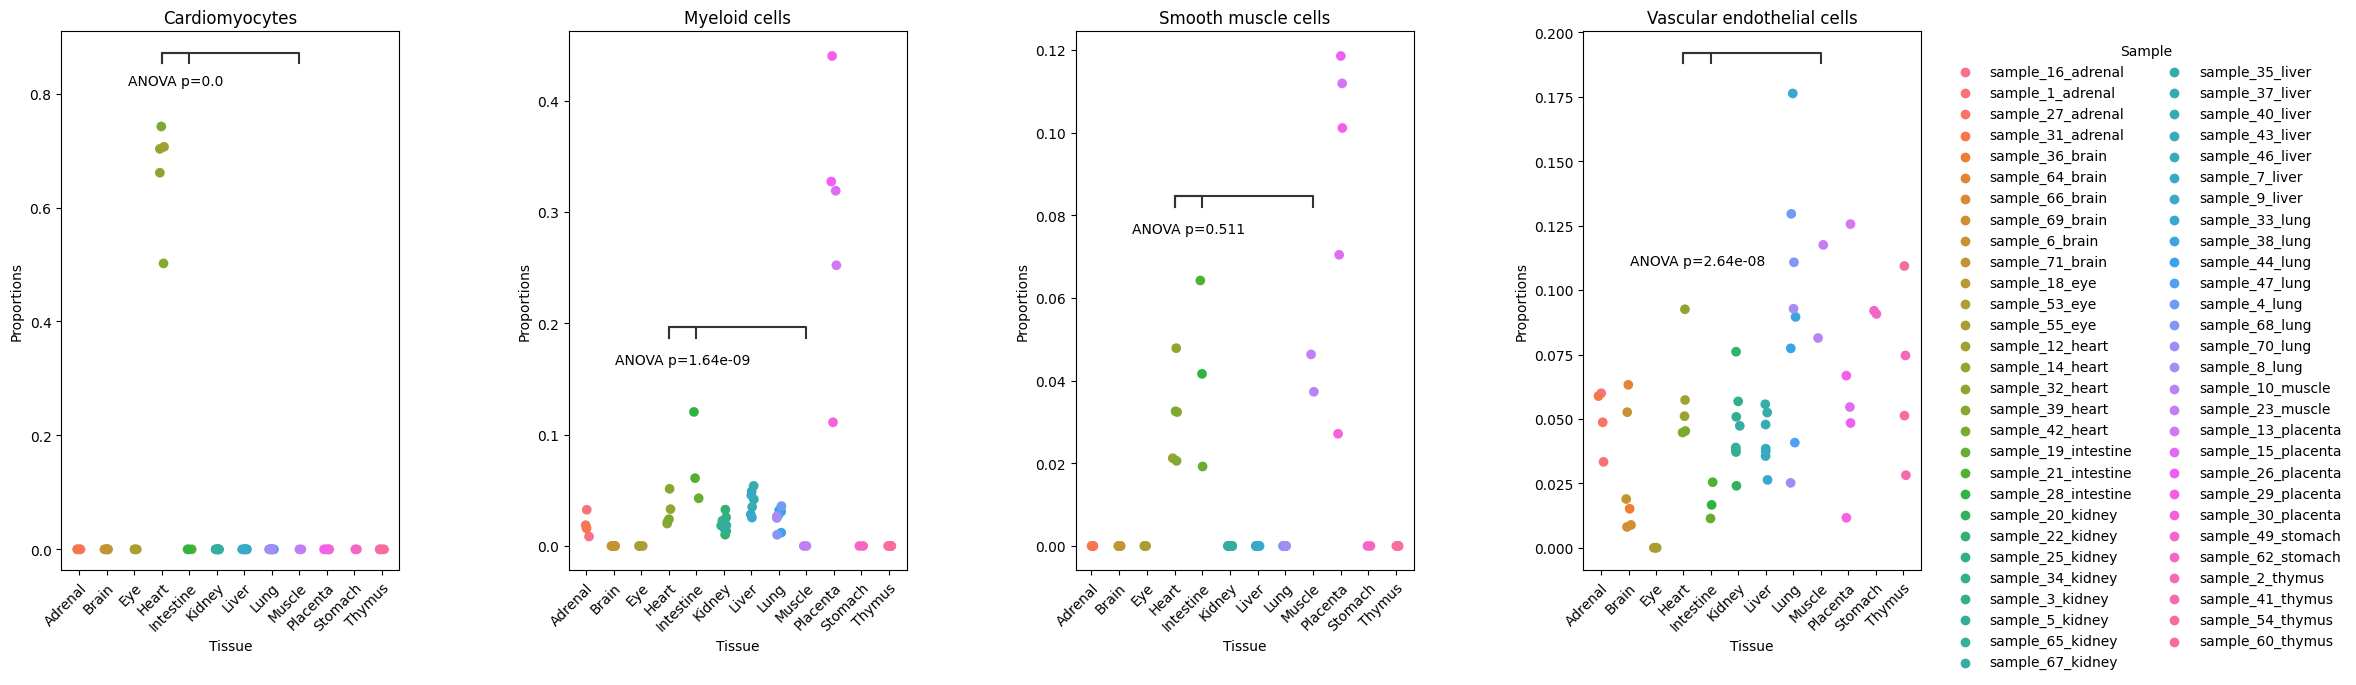

In [21]:
scanpro_out.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"], n_columns=4,
                 save=f"{FIG_PATH}/scatac_rep_arcsin_heart-intestine-muscle.pdf")

#### No replicates

In [22]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue',
                              conditions=["Heart", "Intestine", "Muscle"])
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep_logit_heart-intestine-muscle.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 78.6 seconds


In [23]:
scanpro_out_norep = scanpro.scanpro(fetal_scatac, clusters_col='cell_type',
                              conds_col='Tissue',
                              conditions=["Heart", "Intestine", "Muscle"], transform="arcsin")
scanpro_out_norep.results.to_csv("results/scatac_scanpro_norep_arcsin_heart-intestine-muscle.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 77.75 seconds


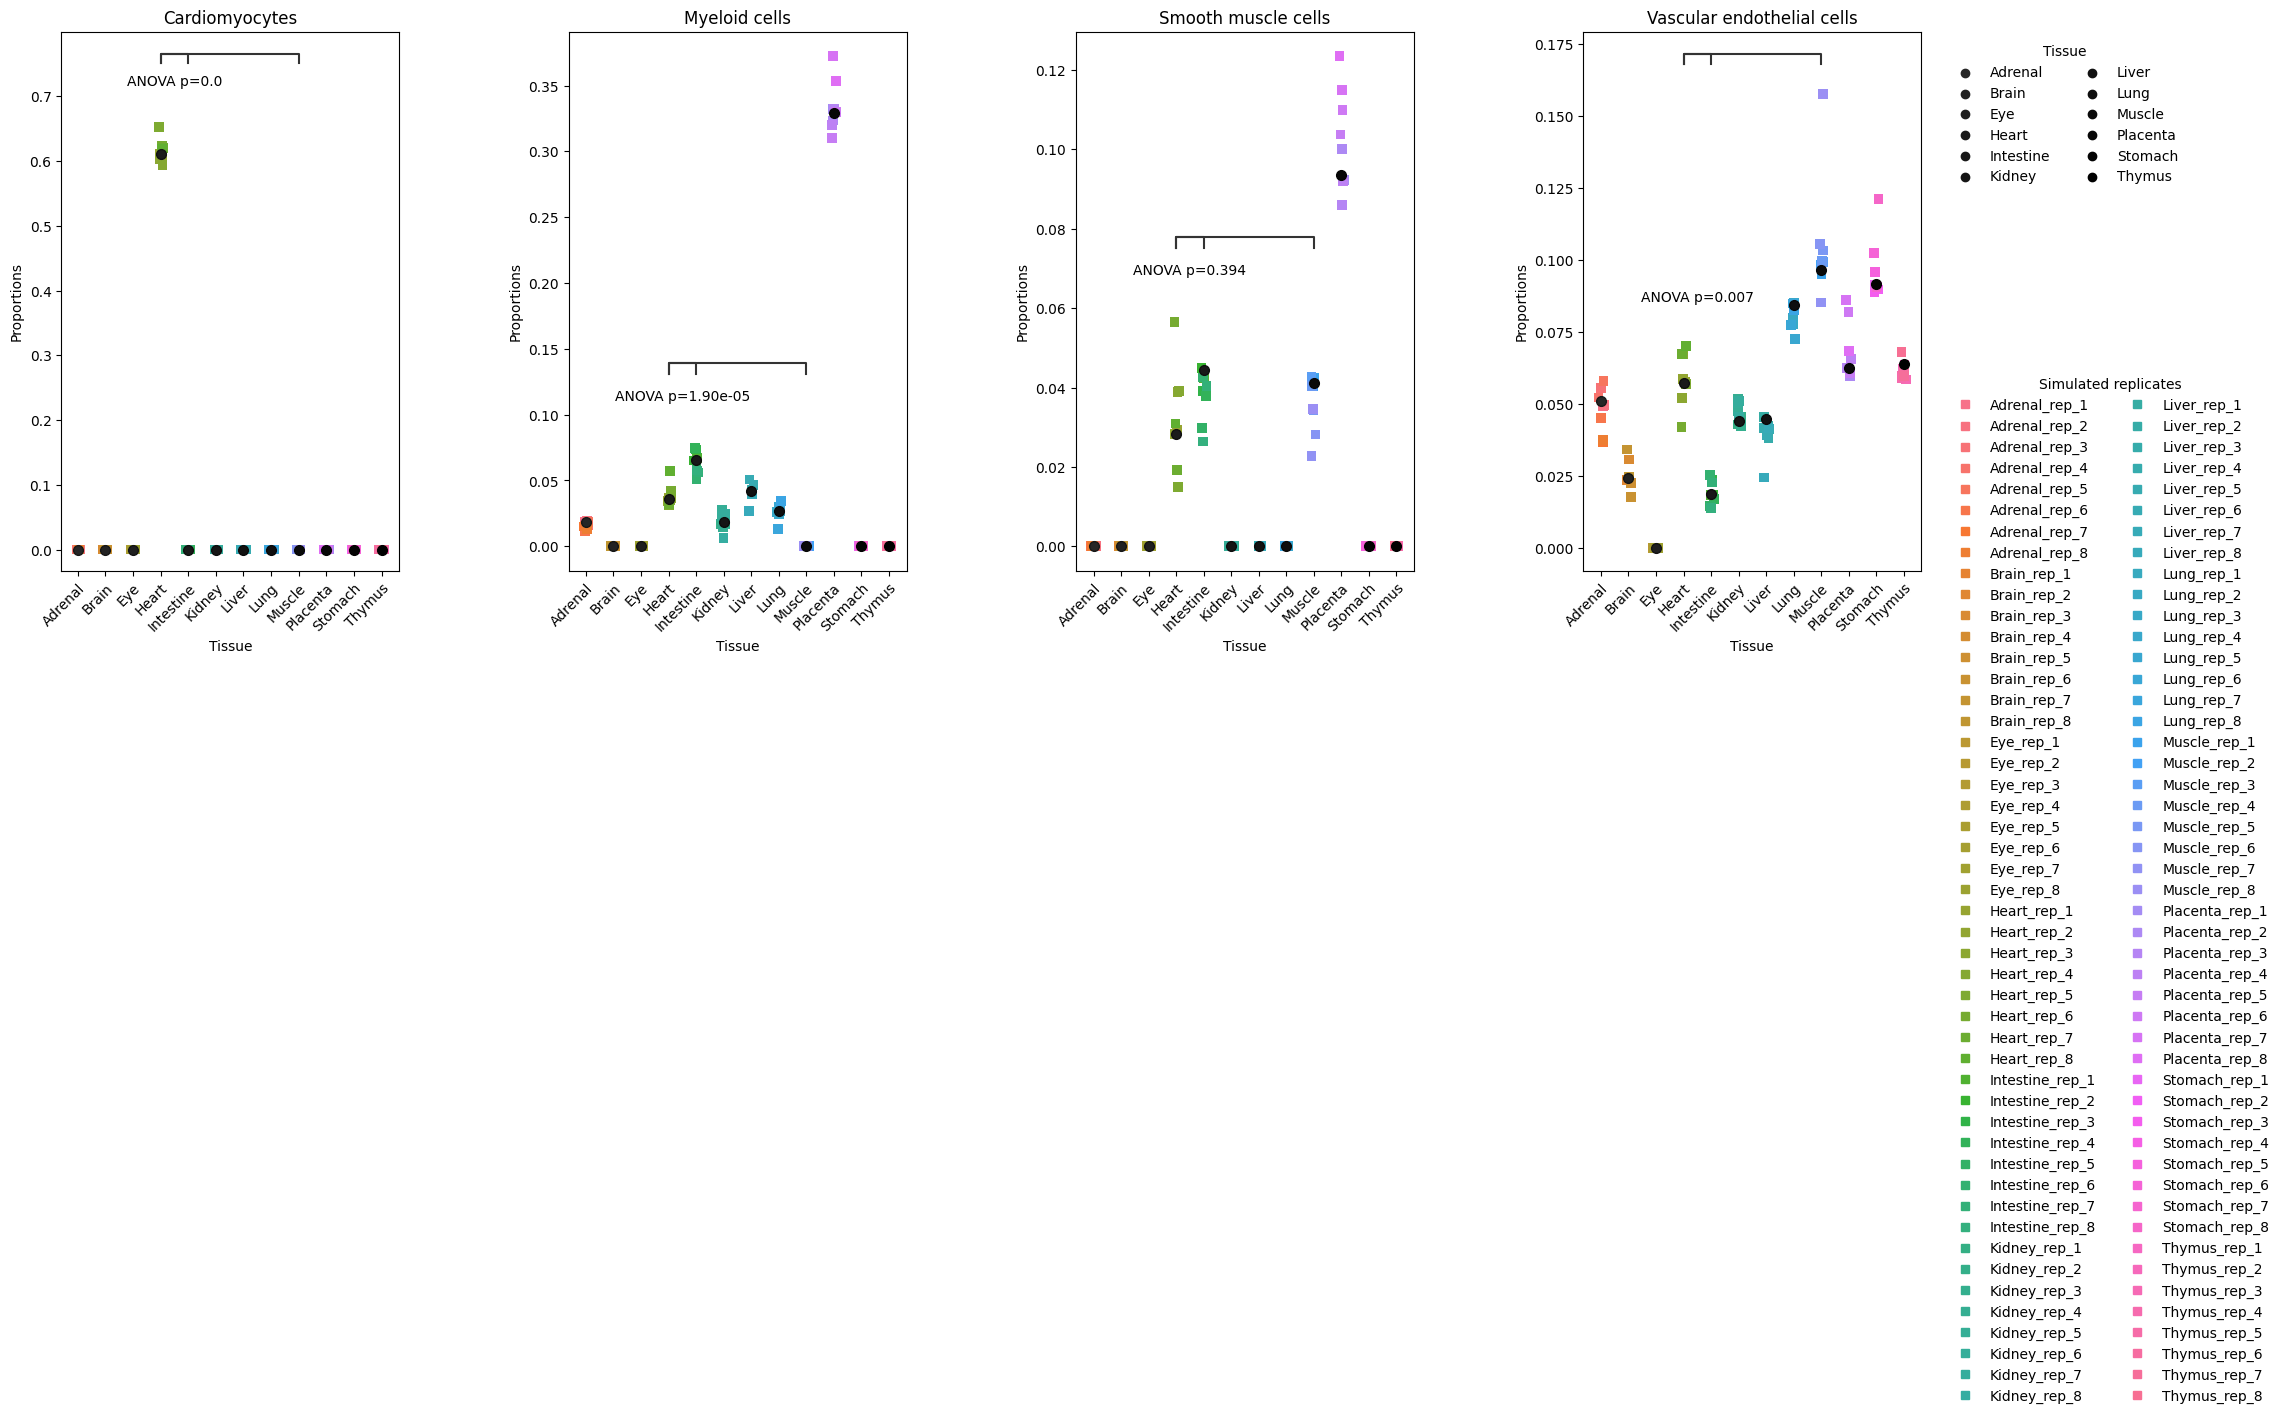

In [24]:
scanpro_out_norep.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"], 
                       n_columns=4, save=f"{FIG_PATH}/scatac_norep_arcsin_heart-intestine-muscle.pdf")

-----------

### Compare

In [25]:
# replace very small p-values
p_values_rep = np.array(scanpro_out.results.iloc[:,-1])
p_values_rep[p_values_rep == 0] = 1e-20

p_values_norep = np.array(scanpro_out_norep.results.iloc[:,-1])
p_values_norep[p_values_norep == 0] = 1e-20

# get results with and without replicates
compare = {'Replicated': -np.log10(p_values_rep),
           'Unreplicated': -np.log10(p_values_norep)}

compare = pd.DataFrame(compare, index=scanpro_out.results.index)

compare

,Replicated,Unreplicated
clusters,,
Cardiomyocytes,20.000000,20.000000
Chromaffin cells,20.000000,3.194282
Erythroblasts,10.155453,4.560178
Intestinal epithelial cells,13.304671,20.000000
Lymphoid cells,4.061452,13.782863
Myeloid cells,8.786184,4.720496
Satellite cells,20.000000,20.000000
Skeletal muscle cells,20.000000,20.000000
Smooth muscle cells,0.291854,0.404995


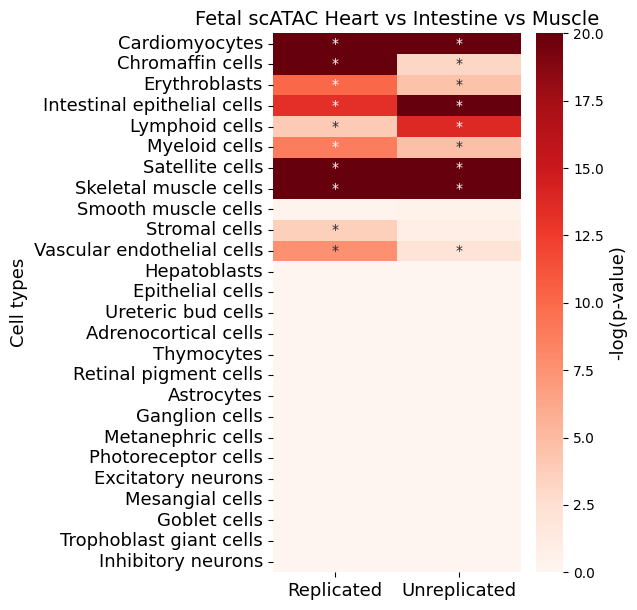

In [26]:
# annotation for heatmap
annot = {'Replicated': ['*' if value < 0.05 else '' for value in scanpro_out.results.iloc[:,-1].to_list()],
         'Unreplicated': ['*' if value < 0.05 else '' for value in scanpro_out_norep.results.iloc[:,-1].to_list()]}

fig, ax = plt.subplots(1, 1, figsize=(4, 7))

sns.heatmap(compare, annot=pd.DataFrame(annot), fmt='', cmap='Reds',
            ax=ax, cbar_kws={'label': '-log(p-value)'})

ax.set_title("Fetal scATAC Heart vs Intestine vs Muscle", fontsize=14)
ax.set_ylabel('Cell types', fontsize=13)

plt.tick_params(axis='both', which='major', labelsize=13)
ax.figure.axes[-1].yaxis.label.set_size(13)

#plt.savefig(f'{FIG_PATH}/heart_vs_intestine_vs_muscle_all.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{FIG_PATH}/scatac_heart_vs_intestine_vs_muscle_all_heatmap.pdf', dpi=300, bbox_inches='tight')

plt.show()

## subset

In [27]:
fetal_scatac_subset = fetal_scatac[fetal_scatac["Tissue"].isin(["Heart", "Muscle", "Intestine"])]

# delete unknown celltypes
celltypes = fetal_scatac[fetal_scatac["Tissue"].isin(["Heart", "Muscle", "Intestine"])]['cell_type'].unique()

In [28]:
subset_out = scanpro.scanpro(fetal_scatac_subset, clusters_col='cell_type',
                             conds_col='Tissue', samples_col='Sample')
subset_out.results.to_csv("results/scatac_scanpro_rep_logit_heart-intestine-muscle_subset.tsv", sep="\t")

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [29]:
subset_out = scanpro.scanpro(fetal_scatac_subset, clusters_col='cell_type',
                             conds_col='Tissue', samples_col='Sample', transform='arcsin')
subset_out.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Heart,mean_props_Intestine,mean_props_Muscle,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Cardiomyocytes,0.342561,0.662907,0.000000,2.622538e-17,231.463460,0.000000e+00,0.000000e+00
Chromaffin cells,0.005748,0.000000,0.019419,-3.056422e-18,63.793918,0.000000e+00,0.000000e+00
Erythroblasts,0.017344,0.023151,0.000000,1.206336e-18,23.992149,3.804890e-11,6.975631e-11
Intestinal epithelial cells,0.124812,0.000000,0.406002,-6.390298e-17,31.423507,2.253753e-14,4.958256e-14
Lymphoid cells,0.100595,0.047833,0.238626,-3.581810e-17,9.552555,7.101961e-05,8.680175e-05
Myeloid cells,0.038976,0.030123,0.074752,-9.683707e-18,20.683329,1.040745e-09,1.635457e-09
Satellite cells,0.039531,0.000000,0.000000,2.585864e-01,3138.946751,0.000000e+00,0.000000e+00
Skeletal muscle cells,0.054913,0.000000,0.000000,3.501920e-01,444.896219,0.000000e+00,0.000000e+00
Smooth muscle cells,0.034885,0.030924,0.041686,4.180586e-02,0.671850,5.107628e-01,5.107628e-01


In [30]:
subset_out.results.to_csv("results/scatac_scanpro_rep_arcsin_heart-intestine-muscle_subset.tsv", sep="\t")

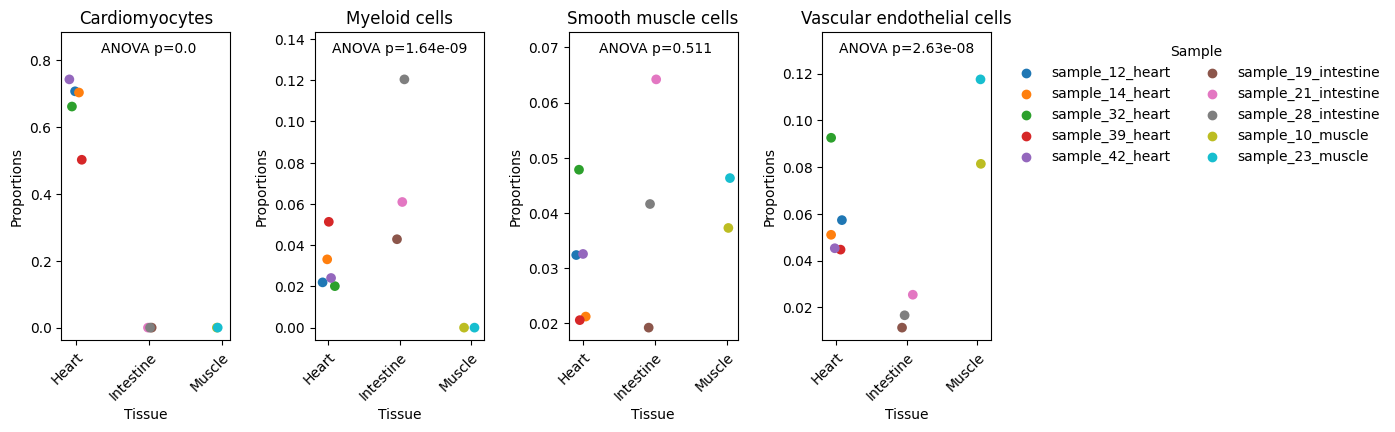

In [31]:
subset_out.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"],
                n_columns=4, save=f"{FIG_PATH}/scatac_rep_arcsin_heart-intestine-muscle_subset.pdf")

In [32]:
subset_out_norep = scanpro.scanpro(fetal_scatac_subset, clusters_col='cell_type',
                                   conds_col='Tissue', transform='arcsin')
subset_out_norep.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 19.89 seconds


,baseline_props,mean_props_Heart,mean_props_Intestine,mean_props_Muscle,p_values
clusters,,,,,
Cardiomyocytes,0.342561,0.612001,0.000000,0.000000,0.000000e+00
Chromaffin cells,0.005748,0.000000,0.018537,0.000000,2.359522e-10
Erythroblasts,0.017344,0.028744,0.000000,0.000000,3.960324e-15
Intestinal epithelial cells,0.124812,0.000000,0.437406,0.000000,0.000000e+00
Lymphoid cells,0.100595,0.070048,0.204966,0.000000,0.000000e+00
Myeloid cells,0.038976,0.033848,0.063665,0.000000,1.583701e-11
Satellite cells,0.039531,0.000000,0.000000,0.257384,0.000000e+00
Skeletal muscle cells,0.054913,0.000000,0.000000,0.355429,0.000000e+00
Smooth muscle cells,0.034885,0.026520,0.040344,0.039962,2.075169e-01


In [33]:
subset_out_norep.results.to_csv("results/scatac_scanpro_norep_arcsin_heart-intestine-muscle_subset.tsv", sep="\t")

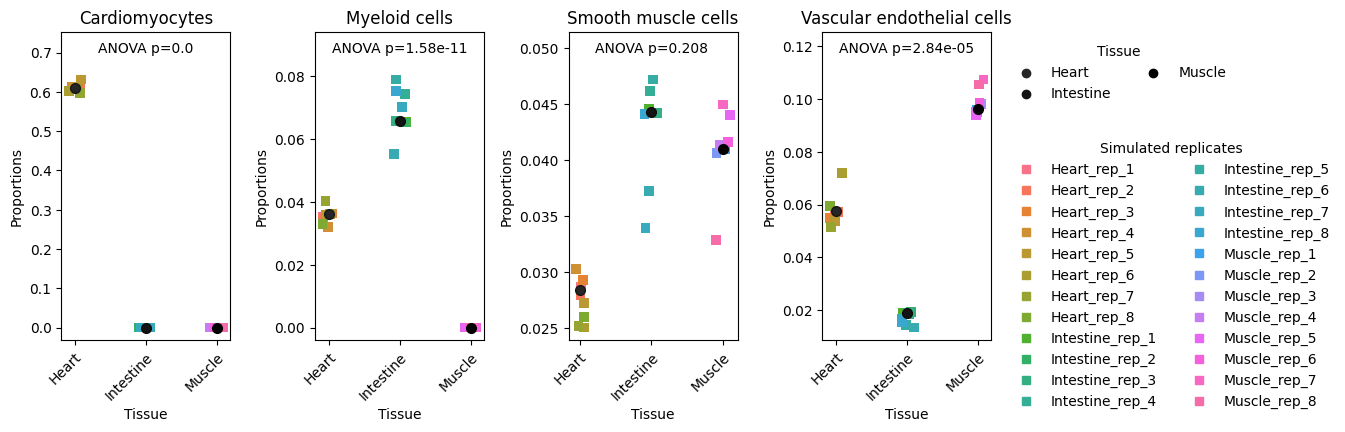

In [34]:
subset_out_norep.plot(clusters=["Cardiomyocytes", "Myeloid cells", "Smooth muscle cells", "Vascular endothelial cells"],
                n_columns=4, save=f"{FIG_PATH}/scatac_norep_arcsin_heart-intestine-muscle_subset.pdf")

### Compare

In [35]:
# replace very small p-values
p_values_rep = np.array(subset_out.results.iloc[:,-1])
p_values_rep[p_values_rep == 0] = 1e-20

p_values_norep = np.array(subset_out_norep.results.iloc[:,-1])
p_values_norep[p_values_norep == 0] = 1e-20

# get results with and without replicates
compare = {'Replicated': -np.log10(p_values_rep),
           'Unreplicated': -np.log10(p_values_norep)}

compare = pd.DataFrame(compare, index=subset_out_norep.results.index)

compare

,Replicated,Unreplicated
clusters,,
Cardiomyocytes,20.000000,20.000000
Chromaffin cells,20.000000,9.627176
Erythroblasts,10.156416,14.402269
Intestinal epithelial cells,13.304671,20.000000
Lymphoid cells,4.061472,20.000000
Myeloid cells,8.786361,10.800327
Satellite cells,20.000000,20.000000
Skeletal muscle cells,20.000000,20.000000
Smooth muscle cells,0.291781,0.682946


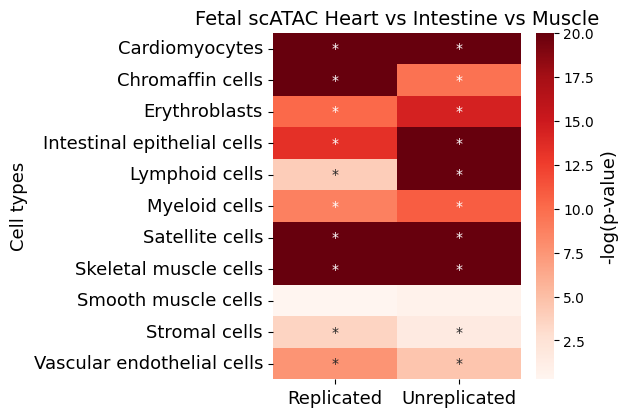

In [36]:
# annotation for heatmap
annot = {'Replicated': ['*' if value < 0.05 else '' for value in subset_out.results.iloc[:,-1].to_list()],
         'Unreplicated': ['*' if value < 0.05 else '' for value in subset_out_norep.results.iloc[:,-1].to_list()]}

fig, ax = plt.subplots(1, 1, figsize=(4, 4.5))

sns.heatmap(compare, annot=pd.DataFrame(annot), fmt='', cmap='Reds',
            ax=ax, cbar_kws={'label': '-log(p-value)'})

ax.set_title("Fetal scATAC Heart vs Intestine vs Muscle", fontsize=14)
ax.set_ylabel('Cell types', fontsize=13)

plt.tick_params(axis='both', which='major', labelsize=13)
ax.figure.axes[-1].yaxis.label.set_size(13)

#plt.savefig(f'{FIG_PATH}/ischaemic_vs_ctrl.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{FIG_PATH}/scatac_heart_vs_intestine_vs_muscle_subset_heatmap.pdf', dpi=300, bbox_inches='tight')

plt.show()